#📌 Extracción

Extracción de datos

Descripción

Para iniciar tu análisis, necesitarás importar los datos de la API de Telecom X. Estos datos están disponibles en formato JSON y contienen información esencial sobre los clientes, incluyendo datos demográficos, tipo de servicio contratado y estado de evasión.

¿Qué debes hacer?

✅ Cargar los datos directamente desde la API utilizando Python.

✅ Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.

In [40]:
import pandas as pd

# Cargar los datos directamente desde la API utilizando Python
raw_url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json'

try:
    # Convertir los datos a un DataFrame de Pandas
    df = pd.read_json(raw_url)
    print(f"DataFrame cargado exitosamente. Filas: {len(df)}, Columnas: {len(df.columns)}")
except Exception as e:
    print(f"Error al cargar el JSON: {e}")
    print("Verifica la URL y tu conexión a internet.")

DataFrame cargado exitosamente. Filas: 7267, Columnas: 6


#🔧 Transformación

Conozce el conjunto de datos

Descripción

Ahora que has extraído los datos, es fundamental comprender la estructura del dataset y el significado de sus columnas. Esta etapa te ayudará a identificar qué variables son más relevantes para el análisis de evasión de clientes.

¿Qué debes hacer?

✅ Explorar las columnas del dataset y verificar sus tipos de datos.

✅ Consultar el diccionario para comprender mejor el significado de las variables.

✅ Identificar las columnas más relevantes para el análisis de evasión.

In [41]:
# Exploración de las columnas del dataset
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
print(df.columns.tolist())
print("\n" + "="*50 + "\n")
print(df.head())
print("\n" + "="*50 + "\n")

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']


   customerID Churn                                                                                      customer                                            phone                                                                                                                                                                           internet                                                                                                                                           account
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 9}   {'PhoneService': 'Yes', 'MultipleLines': 'No'}           {'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'}              {'Contract': 'One year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'C

In [42]:
# Verificación de los tipos de datos de las columnas del dataset
print(df.dtypes)

customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object


#### 🔹 🌟 Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

Columnas  más relevantes para el análisis de evasión

**Churn**: Esta columna te dice directamente si un cliente se fue ("Yes") o se quedó ("No").

**Internet**: Aunque se muestra como un diccionario, esta columna agrupa toda la información relacionada con los servicios de internet del cliente.

**Account**: Similar a internet, esta columna es un diccionario que contiene información vital sobre la relación contractual y financiera del cliente con la empresa.

Comprobación de incoherencias en los datos

Descripción

En este paso, verifica si hay problemas en los datos que puedan afectar el análisis. Presta atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías. Este proceso es esencial para asegurarte de que los datos estén listos para las siguientes etapas.

In [43]:
# Verificación de valores ausentes
print("1. Verificación de valores ausentes:")
print(df[['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']].isnull().sum())
print("\n" + "="*50 + "\n")

1. Verificación de valores ausentes:
customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64




In [44]:
# Verificación de valores duplicados
print("2. Verificación de valores duplicados:")
print(df[['customerID', 'Churn']].duplicated().sum())
print("\n" + "="*50 + "\n")
# Nota: La función .duplicated() no puede procesar directamente columnas que contienen diccionarios (como 'customer', 'phone', 'internet', 'account') sin causar un error.
# Por lo tanto, aquí verificamos duplicados basados en columnas que típicamente no contienen estructuras anidadas complejas.
# Para un chequeo de duplicados en todas las columnas conceptuale primero se necesitaría normalizar (desanidar) las columnas con diccionarios.

2. Verificación de valores duplicados:
0




In [45]:
# Verificación de valores con errores de formato
print("3. Verificación de valores con errores de formato:")
print(df[['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']].dtypes)
print("\n" + "="*50 + "\n")
# Nota: Esto nos da una idea general de los tipos de datos.
# Errores de formato más específicos dentro de los datos anidados se verán mejor después de la normalización.

3. Verificación de valores con errores de formato:
customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object




In [46]:
# Verificación de valores con inconsistencias en las categorías
print("4. Verificación de valores con inconsistencias en las categorías:")
print(df['Churn'].unique())
print("\n" + "="*50 + "\n")
# Nota: El método .unique() está diseñado para operar sobre una Serie de Pandas (una sola columna) no sobre un DataFrame completo o una selección de múltiples columnas a la vez para este propósito.
# Por lo tanto, aquí verificamos inconsistencias en categorías enfocándonos en columnas individuales que se espera sean categóricas, como 'Churn'.
# Para las columnas que contienen diccionarios ('customer', 'phone', 'internet', 'account'), aplicar .unique() directamente no es útil para identificar inconsistencias de categorías en su contenido anidado y podría no funcionar como se espera.
# La revisión de categorías dentro de esos datos anidados se realiza de manera efectiva después de la normalización (desanidado), cuando cada pieza de información del diccionario se convierte en su propia columna.

4. Verificación de valores con inconsistencias en las categorías:
['No' 'Yes' '']




Manejo de inconsistencias

Descripción

Ahora que has identificado las inconsistencias, es momento de aplicar las correcciones necesarias. Ajusta los datos para asegurarte de que estén completos y coherentes, preparándolos para las siguientes etapas del análisis.

In [47]:
#---I---

# Contar las filas con strings vacíos en la columna 'Churn'
filas_con_problema = (df['Churn'] == '').sum()
print(f"Se encontraron {filas_con_problema} filas con valores vacíos en la columna 'Churn'.")

# Crear un nuevo DataFrame 'df_limpio' que excluye esas filas
df_limpio = df[df['Churn'] != ''].copy()
print("Se eliminaron las filas problemáticas.")

# Verificar la limpieza en el nuevo DataFrame
print("\nVerificación en el nuevo DataFrame 'df_limpio':")
print(f"Tamaño original: {df.shape[0]} filas | Tamaño nuevo: {df_limpio.shape[0]} filas")
print("Valores únicos en 'Churn' después de la limpieza:")
print(df_limpio['Churn'].unique())
print("\n" + "="*50 + "\n")

# Nota: Este código identifica y elimina las filas donde la columna 'Churn' contiene un string vacío ('').
# Se crea un nuevo DataFrame llamado 'df_limpio' para trabajar a partir de ahora, asegurando que la variable objetivo solo contenga los valores 'Yes' y 'No'.

Se encontraron 224 filas con valores vacíos en la columna 'Churn'.
Se eliminaron las filas problemáticas.

Verificación en el nuevo DataFrame 'df_limpio':
Tamaño original: 7267 filas | Tamaño nuevo: 7043 filas
Valores únicos en 'Churn' después de la limpieza:
['No' 'Yes']




Columna de cuentas diarias

Descripción

Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

In [48]:
#---II---

# Crear la columna 'Cuentas_Diarias'
df_limpio['Cuentas_Diarias'] = df_limpio['account'].apply(lambda x: x['Charges']['Monthly'] / 30)
print("Se ha creado la columna 'Cuentas_Diarias'.")

# Verificar la nueva columna
print("\nVerificación de la nueva columna:")
pd.set_option('display.max_colwidth', None)
print(df_limpio[['customerID', 'account', 'Cuentas_Diarias']].head())
print("\n" + "="*50 + "\n")

# Nota: Este código crea la columna 'Cuentas_Diarias' en 'df_limpio'.
# El cálculo divide el cobro mensual (extraído de 'account') por 30, asumiendo un mes estándar.

Se ha creado la columna 'Cuentas_Diarias'.

Verificación de la nueva columna:
   customerID                                                                                                                                           account  Cuentas_Diarias
0  0002-ORFBO              {'Contract': 'One year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}         2.186667
1  0003-MKNFE         {'Contract': 'Month-to-month', 'PaperlessBilling': 'No', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 59.9, 'Total': '542.4'}}         1.996667
2  0004-TLHLJ   {'Contract': 'Month-to-month', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Electronic check', 'Charges': {'Monthly': 73.9, 'Total': '280.85'}}         2.463333
3  0011-IGKFF  {'Contract': 'Month-to-month', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Electronic check', 'Charges': {'Monthly': 98.0, 'Total': '1237.85'}}         3.266667
4  0013-EXCHZ        {'Contract': 'Mo

Estandarización y transformación de datos (opcional)

Descripción

La estandarización y transformación de datos es una etapa opcional, pero altamente recomendada, ya que busca hacer que la información sea más consistente, comprensible y adecuada para el análisis. Durante esta fase, por ejemplo, puedes convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0), lo que facilita el procesamiento matemático y la aplicación de modelos analíticos.

Además, traducir o renombrar columnas y datos hace que la información sea más accesible y fácil de entender, especialmente cuando se trabaja con fuentes externas o términos técnicos. Aunque no es un paso obligatorio, puede mejorar significativamente la claridad y comunicación de los resultados, facilitando la interpretación y evitando confusiones, especialmente al compartir información con stakeholders no técnicos.

In [49]:
#---III---

# Convertir la columna 'Churn' a formato binario (1 para 'Yes', 0 para 'No')
df_limpio['Churn'] = df_limpio['Churn'].map({'Yes': 1, 'No': 0})
print("Se ha convertido la columna 'Churn' a formato binario.")

# Renombrar las columnas a español para mayor claridad
mapeo_columnas = {
    'customerID': 'ID_Cliente',
    'Churn': 'Evasion',
    'customer': 'Cliente',
    'phone': 'Servicio_Telefonico',
    'internet': 'Servicio_Internet',
    'account': 'Cuenta',
    'Cuentas_Diarias': 'Costo_Diario'
}
df_limpio = df_limpio.rename(columns=mapeo_columnas)
print("Se han renombrado las columnas del DataFrame.")

# Verificar las transformaciones
print("\nVerificación de las transformaciones:")
print(df_limpio.head())
print("\n" + "="*50 + "\n")

# Nota: Este código estandariza el DataFrame 'df_limpio' de dos maneras principales.
# La columna 'Evasion' se convierte a formato binario (1/0) y las columnas se renombran a español.

Se ha convertido la columna 'Churn' a formato binario.
Se han renombrado las columnas del DataFrame.

Verificación de las transformaciones:
   ID_Cliente  Evasion                                                                                       Cliente                              Servicio_Telefonico                                                                                                                                                                  Servicio_Internet                                                                                                                                            Cuenta  Costo_Diario
0  0002-ORFBO        0  {'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 9}   {'PhoneService': 'Yes', 'MultipleLines': 'No'}           {'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'}           

#📊 Carga y análisis

Análisis Descriptivo

Descripción

Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

In [50]:
#---IV---

# Calcular estadísticas descriptivas para las columnas numéricas
print("Análisis Descriptivo de Columnas Numéricas:")
print(df_limpio.describe())
print("\n" + "="*50 + "\n")

# Calcular estadísticas descriptivas para las columnas categóricas (object)
print("Análisis Descriptivo de Columnas Categóricas:")
print(df_limpio.describe(include=['object']))
print("\n" + "="*50 + "\n")

# Nota: Este código realiza un análisis descriptivo completo usando el método .describe().
# Se aplica primero a las columnas numéricas (mostrando media, mediana, desviación estándar, etc.) y luego a las columnas categóricas (mostrando conteo, valores únicos y frecuencia).

Análisis Descriptivo de Columnas Numéricas:
           Evasion  Costo_Diario
count  7043.000000   7043.000000
mean      0.265370      2.158723
std       0.441561      1.003002
min       0.000000      0.608333
25%       0.000000      1.183333
50%       0.000000      2.345000
75%       1.000000      2.995000
max       1.000000      3.958333


Análisis Descriptivo de Columnas Categóricas:
        ID_Cliente                                                                                   Cliente                             Servicio_Telefonico                                                                                                                                                                                                                                                           Servicio_Internet                                                                                                                                      Cuenta
count         7043                            

Distribución de evasión

Descripción

En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

Análisis de la Distribución de Evasión:
Evasion
0    5174
1    1869
Name: count, dtype: int64




<Figure size 1000x600 with 0 Axes>

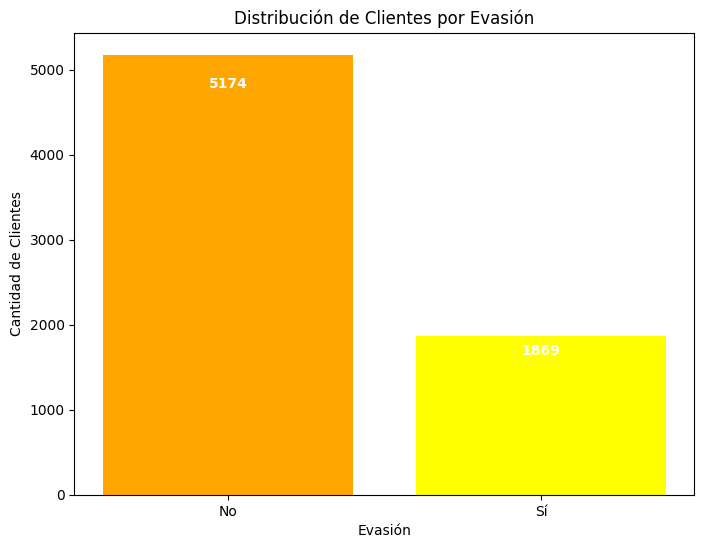

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette(['#FF69B4', '#FFA500', '#98FF98', '#FFD700'])
plt.style.use('seaborn-v0_8-bright')
plt.figure(figsize=(10,6))
#---V---

# Importar las librerías necesarias
import matplotlib.pyplot as plt

# Calcular la distribución de la variable 'Evasion'
distribucion_evasion = df_limpio['Evasion'].value_counts()
print("Análisis de la Distribución de Evasión:")
print(distribucion_evasion)
print("\n" + "="*50 + "\n")

# Crear el gráfico de barras para visualizar la distribución
etiquetas = ['No', 'Sí']
valores = [distribucion_evasion.get(0, 0), distribucion_evasion.get(1, 0)]
plt.figure(figsize=(8, 6))
bars = plt.bar(etiquetas, valores, color=['orange', 'yellow'])
plt.title('Distribución de Clientes por Evasión')
plt.ylabel('Cantidad de Clientes')
plt.xlabel('Evasión')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval - (yval * 0.05), int(yval), va='top', ha='center', color='white', fontweight='bold')
plt.show()

# Nota: Este código primero cuenta el número de clientes para cada categoría de la variable 'Evasion' (0 y 1).
# Luego, genera un gráfico de barras para visualizar claramente la proporción de clientes que permanecieron frente a los que no.

Recuento de evasión por variables categóricas

Descripción

Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.

Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

Se eliminaron las filas problemáticas.
Se ha creado la columna 'Cuentas_Diarias'.
Se ha convertido la columna 'Churn' a formato binario.
Se han renombrado las columnas del DataFrame.


<Figure size 1000x600 with 0 Axes>

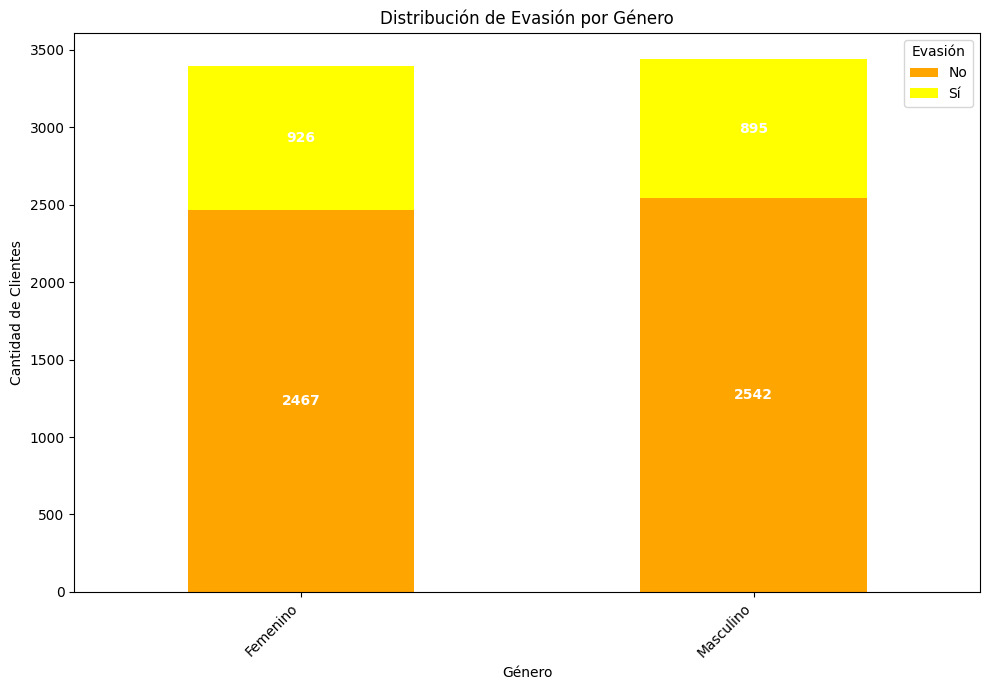

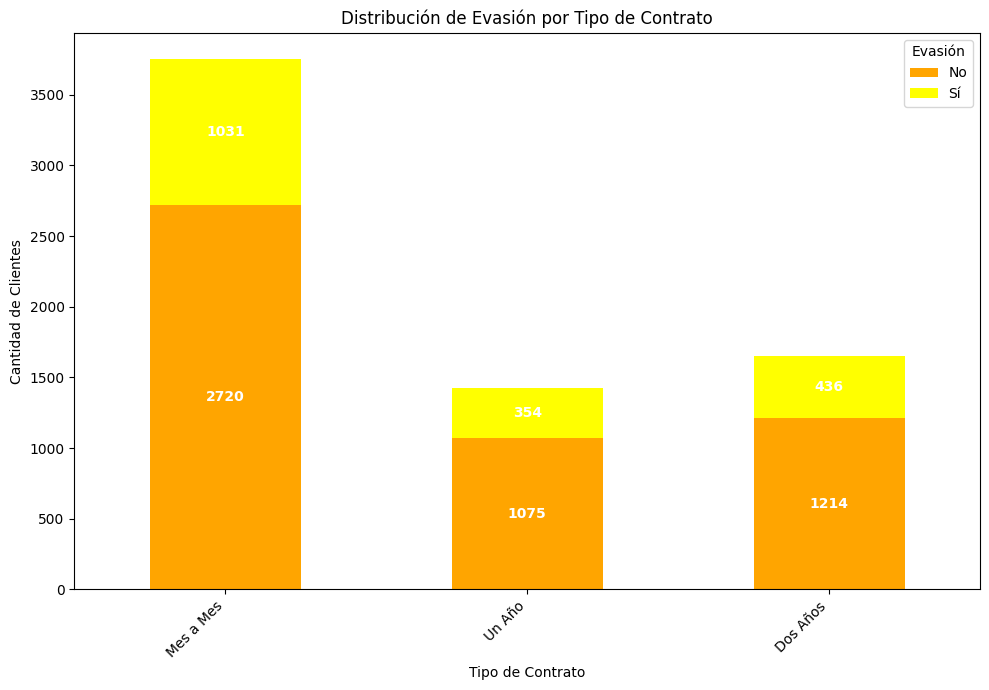

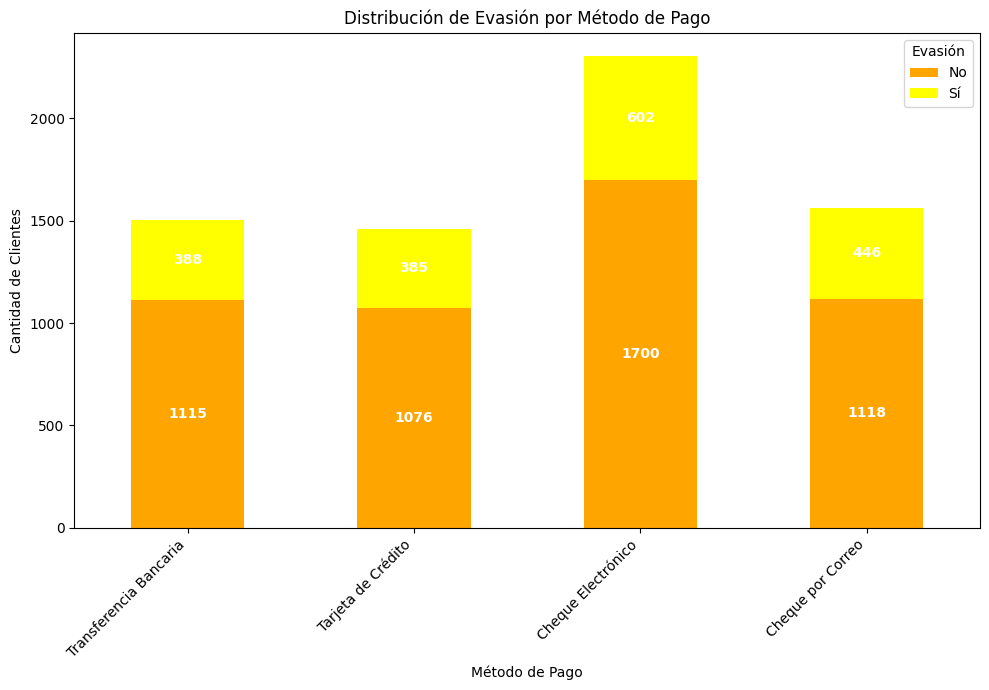

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette(['#FF69B4', '#FFA500', '#98FF98', '#FFD700'])
plt.style.use('seaborn-v0_8-bright')
plt.figure(figsize=(10,6))
#---VI---

# Crear un nuevo DataFrame 'df_limpio'
df_limpio = df[df['Churn'] != ''].copy()
print("Se eliminaron las filas problemáticas.")

# Crear la columna 'Cuentas_Diarias'
df_limpio['Cuentas_Diarias'] = df_limpio['account'].apply(lambda x: x['Charges']['Monthly'] / 30)
print("Se ha creado la columna 'Cuentas_Diarias'.")

# Convertir la columna 'Churn' a formato binario (1 para 'Yes', 0 para 'No')
df_limpio['Churn'] = df_limpio['Churn'].map({'Yes': 1, 'No': 0})
print("Se ha convertido la columna 'Churn' a formato binario.")

# Renombrar las columnas a español para mayor claridad
mapeo_columnas = {
    'customerID': 'ID_Cliente',
    'Churn': 'Evasion',
    'customer': 'Cliente',
    'phone': 'Servicio_Telefonico',
    'internet': 'Servicio_Internet',
    'account': 'Cuenta',
    'Cuentas_Diarias': 'Costo_Diario'
}
df_limpio = df_limpio.rename(columns=mapeo_columnas)
print("Se han renombrado las columnas del DataFrame.")

#---Normalización de Datos Anidados---

# Normalizar las columnas con diccionarios
df_cliente_norm = pd.json_normalize(df_limpio['Cliente'])
df_internet_norm = pd.json_normalize(df_limpio['Servicio_Internet'])
df_cuenta_norm = pd.json_normalize(df_limpio['Cuenta'])

# Unir todas las partes normalizadas en un solo DataFrame final
df_final = df_limpio[['ID_Cliente', 'Evasion', 'Costo_Diario']].copy()
df_final = pd.concat([df_final, df_cliente_norm, df_internet_norm, df_cuenta_norm], axis=1)

#---Análisis y Visualización de Evasión por Categoría---

# Lista de variables categóricas a analizar
traducciones = {
    'Female': 'Femenino',
    'Male': 'Masculino',
    'Month-to-month': 'Mes a Mes',
    'One year': 'Un Año',
    'Two year': 'Dos Años',
    'Electronic check': 'Cheque Electrónico',
    'Mailed check': 'Cheque por Correo',
    'Bank transfer (automatic)': 'Transferencia Bancaria',
    'Credit card (automatic)': 'Tarjeta de Crédito'
}
variables_a_analizar = ['gender', 'Contract', 'PaymentMethod']
nombres_en_espanol = ['Género', 'Tipo de Contrato', 'Método de Pago']

# Nombres en español para los títulos de los gráficos
nombres_en_espanol = ['Género', 'Tipo de Contrato', 'Método de Pago']

# Desarrollo del gráfico
for i, variable in enumerate(variables_a_analizar):

    # Crear una tabla de contingencia (crosstab)
    crosstab = pd.crosstab(df_final[variable], df_final['Evasion'])

    # Traducir el índice del crosstab (las etiquetas del eje X)
    crosstab.rename(index=traducciones, inplace=True)

    # Crear el gráfico de barras apilado
    ax = crosstab.plot(kind='bar', stacked=True, figsize=(10, 7), color=['orange', 'yellow'])

    # Añadir el número sobre cada segmento de la barra
    for container in ax.containers:
        ax.bar_label(container, label_type='center', fmt='%d', color='white', fontweight='bold')

    # Configurar el gráfico
    plt.title(f'Distribución de Evasión por {nombres_en_espanol[i]}')
    plt.ylabel('Cantidad de Clientes')
    plt.xlabel(nombres_en_espanol[i])
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Evasión', labels=['No', 'Sí'])

    # Ajustar el layout y mostrar el gráfico
    plt.tight_layout()
    plt.show()

# Nota: Este código primero realiza un paso crucial de normalización para "descomprimir" los datos anidados (acción que se hará en VII, VIII y en IX también).
# Esto convierte las columnas 'Cliente', 'Servicio_Internet' y 'Cuenta' que son diccionarios en columnas individuales y utilizables.
# Luego, para cada variable categórica clave, se genera un gráfico de barras apilado que muestra visualmente cuántos clientes abandonaron el servicio y cuántos no, dentro de cada categoría.

Conteo de evasión por variables numéricas

Descripción

En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.

Se eliminaron las filas problemáticas.
Se ha creado la columna 'Cuentas_Diarias'.
Se ha convertido la columna 'Churn' a formato binario.
Se han renombrado las columnas del DataFrame.


<Figure size 1000x600 with 0 Axes>

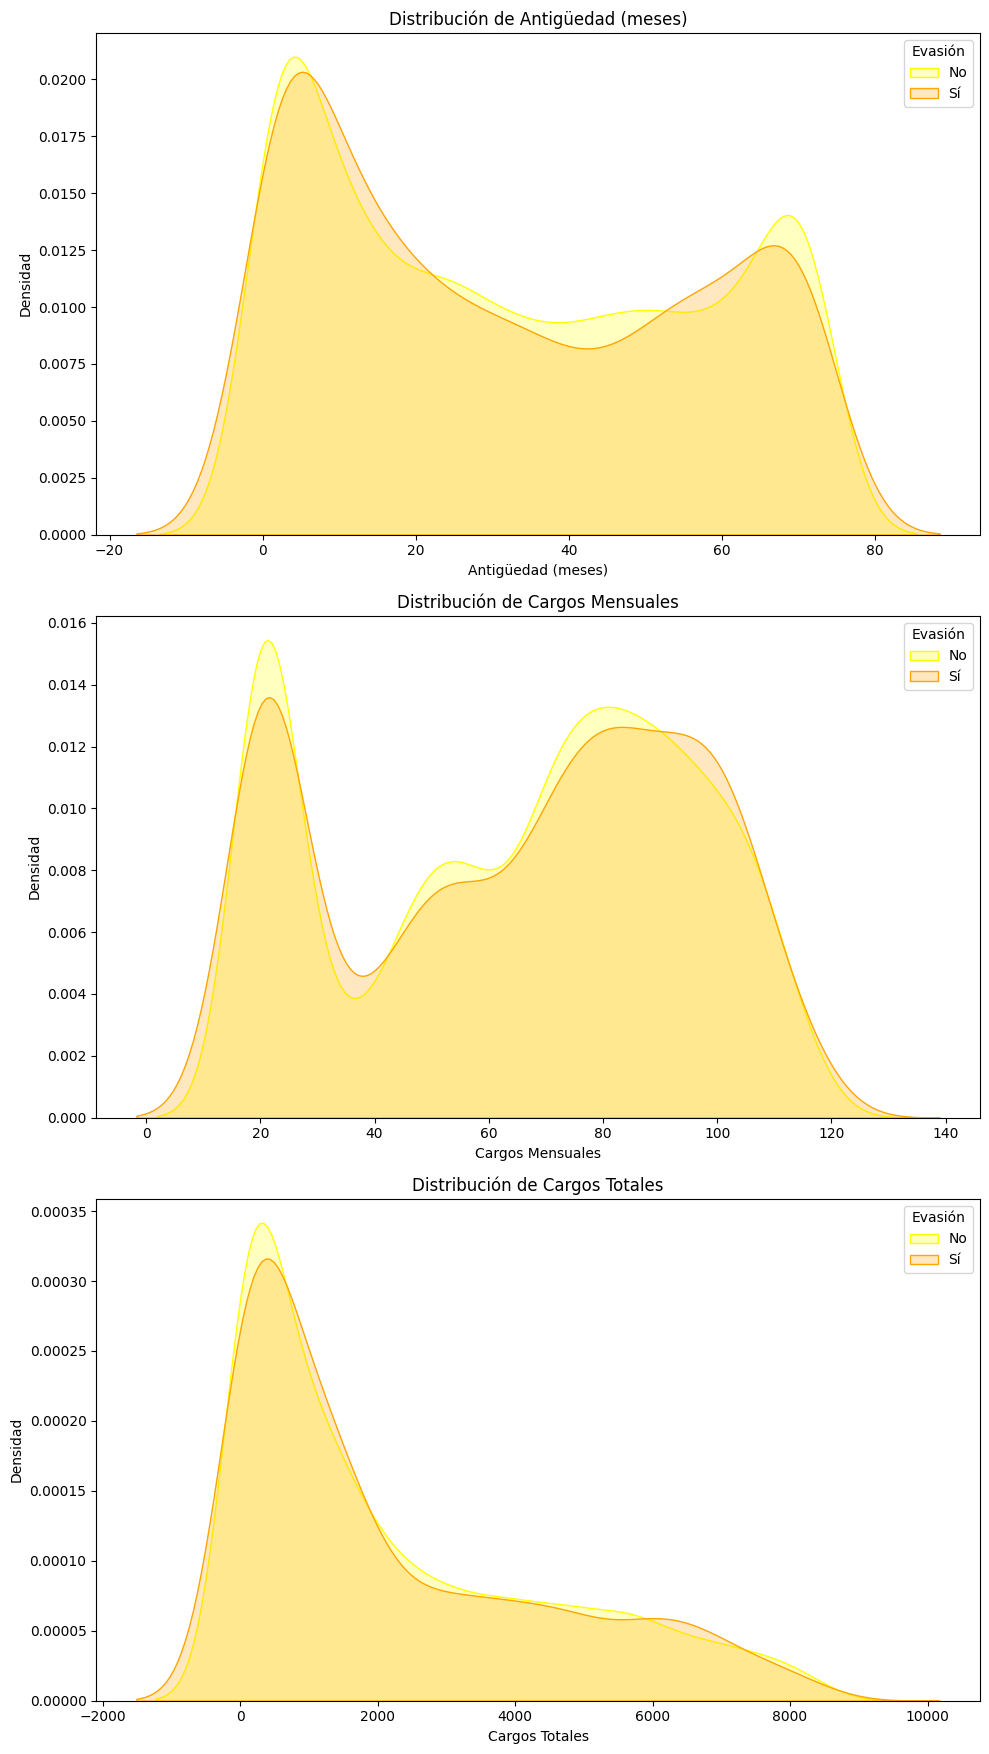

Text(0.5, 1.0, 'Visualización Mejorada')

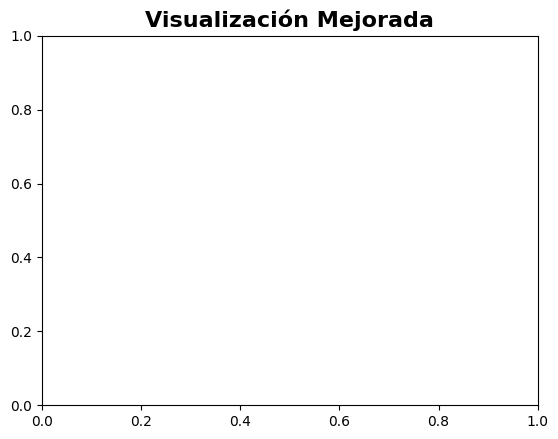

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette(['#FF69B4', '#FFA500', '#98FF98', '#FFD700'])
plt.style.use('seaborn-v0_8-bright')
plt.figure(figsize=(10,6))
#---VII---

# Importar las librerías necesarias
import seaborn as sns

# Crear un nuevo DataFrame 'df_limpio'
df_limpio = df[df['Churn'] != ''].copy()
print("Se eliminaron las filas problemáticas.")

# Crear la columna 'Cuentas_Diarias'
df_limpio['Cuentas_Diarias'] = df_limpio['account'].apply(lambda x: x['Charges']['Monthly'] / 30)
print("Se ha creado la columna 'Cuentas_Diarias'.")

# Convertir la columna 'Churn' a formato binario (1 para 'Yes', 0 para 'No')
df_limpio['Churn'] = df_limpio['Churn'].map({'Yes': 1, 'No': 0})
print("Se ha convertido la columna 'Churn' a formato binario.")

# Renombrar las columnas a español para mayor claridad
mapeo_columnas = {
    'customerID': 'ID_Cliente',
    'Churn': 'Evasion',
    'customer': 'Cliente',
    'phone': 'Servicio_Telefonico',
    'internet': 'Servicio_Internet',
    'account': 'Cuenta',
    'Cuentas_Diarias': 'Costo_Diario'
}
df_limpio = df_limpio.rename(columns=mapeo_columnas)
print("Se han renombrado las columnas del DataFrame.")

#---Normalización de Datos Anidados---

# Normalizar las columnas con diccionarios
df_cliente_norm = pd.json_normalize(df_limpio['Cliente'])
df_internet_norm = pd.json_normalize(df_limpio['Servicio_Internet'])
df_cuenta_norm = pd.json_normalize(df_limpio['Cuenta'])

# Unir todas las partes normalizadas en un solo DataFrame final
df_final = df_limpio[['ID_Cliente', 'Evasion', 'Costo_Diario']].copy()
df_final = pd.concat([df_final, df_cliente_norm, df_internet_norm, df_cuenta_norm], axis=1)

#---Corrección de Tipos de Datos Numéricos---

# La columna 'Charges.Total' puede contener espacios y necesita ser convertida a numérica
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')
df_final['Charges.Total'] = df_final['Charges.Total'].fillna(0)

#---Análisis y Visualización de Evasión por Variable Numérica---

# Lista de variables numéricas a analizar
variables_numericas = ['tenure', 'Charges.Monthly', 'Charges.Total']

# Nombres en español para los títulos de los gráficos
nombres_en_espanol_num = ['Antigüedad (meses)', 'Cargos Mensuales', 'Cargos Totales']

# Crear una figura con múltiples subplots para asegurar un tamaño consistente
fig, axes = plt.subplots(nrows=len(variables_numericas), ncols=1, figsize=(10, 6 * len(variables_numericas)))

# Desarrollo del gráfico
for i, variable in enumerate(variables_numericas):

    # Seleccionar el subplot (ax) correspondiente para cada gráfico
    ax = axes[i]

    # Graficar la distribución para clientes que no hicieron evasión (Evasion = 0)
    sns.kdeplot(df_final[df_final['Evasion'] == 0][variable], label='No', fill=True, color='yellow', ax=ax)

    # Graficar la distribución para clientes que sí hicieron evasión (Evasion = 1)
    sns.kdeplot(df_final[df_final['Evasion'] == 1][variable], label='Sí', fill=True, color='orange', ax=ax)

    # Configurar el gráfico
    ax.set_title(f'Distribución de {nombres_en_espanol_num[i]}')
    ax.set_xlabel(nombres_en_espanol_num[i])
    ax.set_ylabel('Densidad')
    ax.legend(title='Evasión')

# Ajustar el layout y mostrar el gráfico
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

# Nota: Este código primero corrige el tipo de dato de la columna 'Charges.Total' para asegurar que sea numérica.
# Luego, para cada variable numérica clave, genera un gráfico de densidad (KDE plot) que permite comparar visualmente las distribuciones entre los clientes que abandonaron el servicio y los que no.
plt.title('Visualización Mejorada', fontsize=16, fontweight='bold')

#📍¡Extra!

Análisis de correlación entre variables

Descripción

Esta actividad es un extra, por lo tanto es OPCIONAL.

Como un paso adicional, puedes explorar la correlación entre diferentes variables del dataset. Esto puede ayudar a identificar qué factores tienen mayor relación con la evasión de clientes, como:

- La relación entre la cuenta diaria y la evasión.
- Cómo la cantidad de servicios contratados afecta la probabilidad de churn.

Puedes usar la función corr() de Pandas para calcular las correlaciones y visualizar los resultados con gráficos de dispersión o matrices de correlación.

**La relación entre la cuenta diaria y la evasión**

Se eliminaron las filas problemáticas.
Se ha creado la columna 'Cuentas_Diarias'.
Se ha convertido la columna 'Churn' a formato binario.
Se han renombrado las columnas del DataFrame.

La correlación entre el Costo Diario y la Evasión es: 0.1934


<Figure size 1000x600 with 0 Axes>

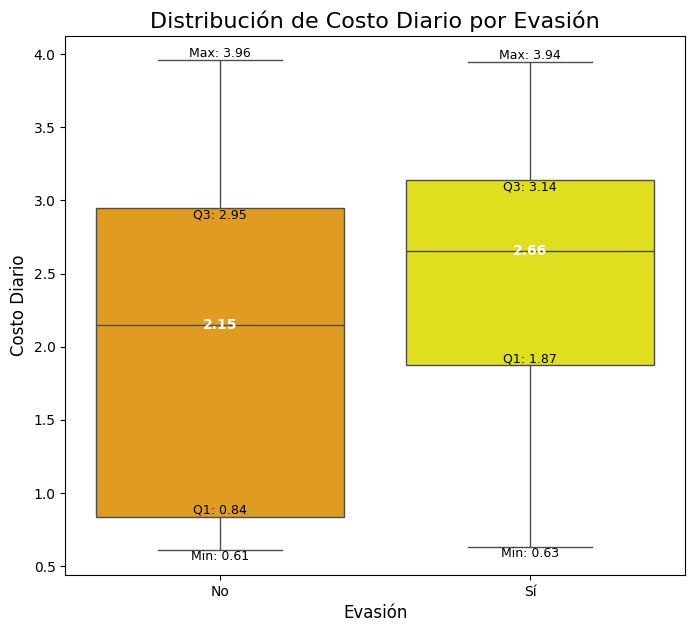

Text(0.5, 1.0, 'Visualización Mejorada')

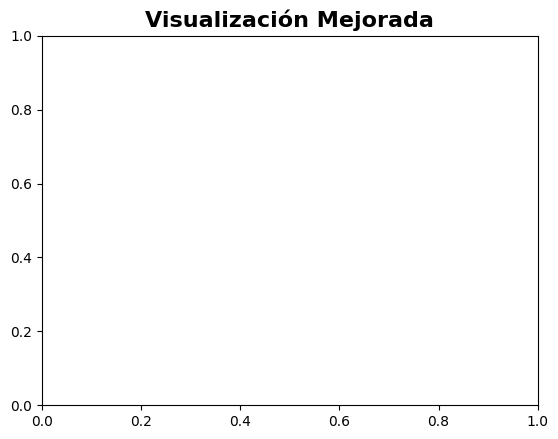

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette(['#FF69B4', '#FFA500', '#98FF98', '#FFD700'])
plt.style.use('seaborn-v0_8-bright')
plt.figure(figsize=(10,6))
#---VIII----

# Crear un nuevo DataFrame 'df_limpio'
df_limpio = df[df['Churn'] != ''].copy()
print("Se eliminaron las filas problemáticas.")

# Crear la columna 'Cuentas_Diarias'
df_limpio['Cuentas_Diarias'] = df_limpio['account'].apply(lambda x: x['Charges']['Monthly'] / 30)
print("Se ha creado la columna 'Cuentas_Diarias'.")

# Convertir la columna 'Churn' a formato binario (1 para 'Yes', 0 para 'No')
df_limpio['Churn'] = df_limpio['Churn'].map({'Yes': 1, 'No': 0})
print("Se ha convertido la columna 'Churn' a formato binario.")

# Renombrar las columnas a español para mayor claridad
mapeo_columnas = {
    'customerID': 'ID_Cliente',
    'Churn': 'Evasion',
    'customer': 'Cliente',
    'phone': 'Servicio_Telefonico',
    'internet': 'Servicio_Internet',
    'account': 'Cuenta',
    'Cuentas_Diarias': 'Costo_Diario'
}
df_limpio = df_limpio.rename(columns=mapeo_columnas)
print("Se han renombrado las columnas del DataFrame.")

#---Normalización de Datos Anidados---

# Normalizar las columnas con diccionarios
df_cliente_norm = pd.json_normalize(df_limpio['Cliente'])
df_internet_norm = pd.json_normalize(df_limpio['Servicio_Internet'])
df_cuenta_norm = pd.json_normalize(df_limpio['Cuenta'])

# Unir todas las partes normalizadas en un solo DataFrame final
df_final = df_limpio[['ID_Cliente', 'Evasion', 'Costo_Diario']].copy()
df_final = pd.concat([df_final, df_cliente_norm, df_internet_norm, df_cuenta_norm], axis=1)

#---Corrección de Tipos de Datos Numéricos---

# La columna 'Charges.Total' puede contener espacios y necesita ser convertida a numérica
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')
df_final['Charges.Total'] = df_final['Charges.Total'].fillna(0)

#---Correlación entre Costo Diario y Evasión---

# Calcular el coeficiente de correlación de Pearson
correlacion = df_final['Costo_Diario'].corr(df_final['Evasion'])
print(f"\nLa correlación entre el Costo Diario y la Evasión es: {correlacion:.4f}")

# Visualizar la relación con un gráfico de cajas (boxplot)
plt.figure(figsize=(8, 7))
ax = sns.boxplot(x='Evasion', y='Costo_Diario', data=df_final, hue='Evasion', palette=['orange', 'yellow'], legend=False)

# Desarrollo del gráfico
for i in [0, 1]:

    # Seleccionar el subconjunto de datos para la categoría actual
    subset = df_final[df_final['Evasion'] == i]

    # Calcular estadísticas clave Q1, Q2, Q3
    q1 = subset['Costo_Diario'].quantile(0.25)
    q3 = subset['Costo_Diario'].quantile(0.75)
    iqr = q3 - q1
    median = subset['Costo_Diario'].median()

    # Calcular los límites de los bigotes (whiskers)
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr

    # Encontrar el valor del cuartil Q1 y del cuartil Q2 real dentro de los límites de las barras
    q1 = subset['Costo_Diario'].quantile(0.25)
    median = subset['Costo_Diario'].median()
    q3 = subset['Costo_Diario'].quantile(0.75)

    # Encontrar el valor mínimo y máximo real dentro de los límites de los bigotes
    valor_minimo = subset['Costo_Diario'][subset['Costo_Diario'] >= limite_inferior].min()
    valor_maximo = subset['Costo_Diario'][subset['Costo_Diario'] <= limite_superior].max()

    # Añadir texto para la mediana Q2 (dentro de la caja, en blanco)
    ax.text(i, median, f'{median:.2f}', ha='center', va='center', color='white', fontweight='bold', fontsize=10)

    # Añadir texto para Q1, Q2, el mínimo y máximo (fuera de la caja, en negro)
    ax.text(i, valor_minimo, f'Min: {valor_minimo:.2f}', ha='center', va='top', color='black', fontsize=9)
    ax.text(i, valor_maximo, f'Max: {valor_maximo:.2f}', ha='center', va='bottom', color='black', fontsize=9)
    ax.text(i, q1, f'Q1: {q1:.2f}', horizontalalignment='center', verticalalignment='bottom', color='black', fontsize=9)
    ax.text(i, q3, f'Q3: {q3:.2f}', horizontalalignment='center', verticalalignment='top', color='black', fontsize=9)

# Configurar el gráfico
ax.set_title('Distribución de Costo Diario por Evasión', fontsize=16)
ax.set_ylabel('Costo Diario', fontsize=12)
ax.set_xlabel('Evasión', fontsize=12)
ax.set_xticks([0, 1])
ax.set_xticklabels(['No', 'Sí'])

# Mostrar el gráfico
plt.show()

# Nota: Este código analiza la relación entre el costo diario y la evasión de dos formas.
# Primero, calcula el coeficiente de correlación.
# Segundo, luego usa un gráfico de cajas (boxplot) para comparar visualmente las distribuciones de costo.
plt.title('Visualización Mejorada', fontsize=16, fontweight='bold')

**Cómo la cantidad de servicios contratados afecta la probabilidad de churn**

Se eliminaron las filas problemáticas.
Se ha creado la columna 'Cuentas_Diarias'.
Se ha convertido la columna 'Churn' a formato binario.
Se han renombrado las columnas del DataFrame.
Se ha creado la columna 'Cantidad_Servicios'.


<Figure size 1000x600 with 0 Axes>

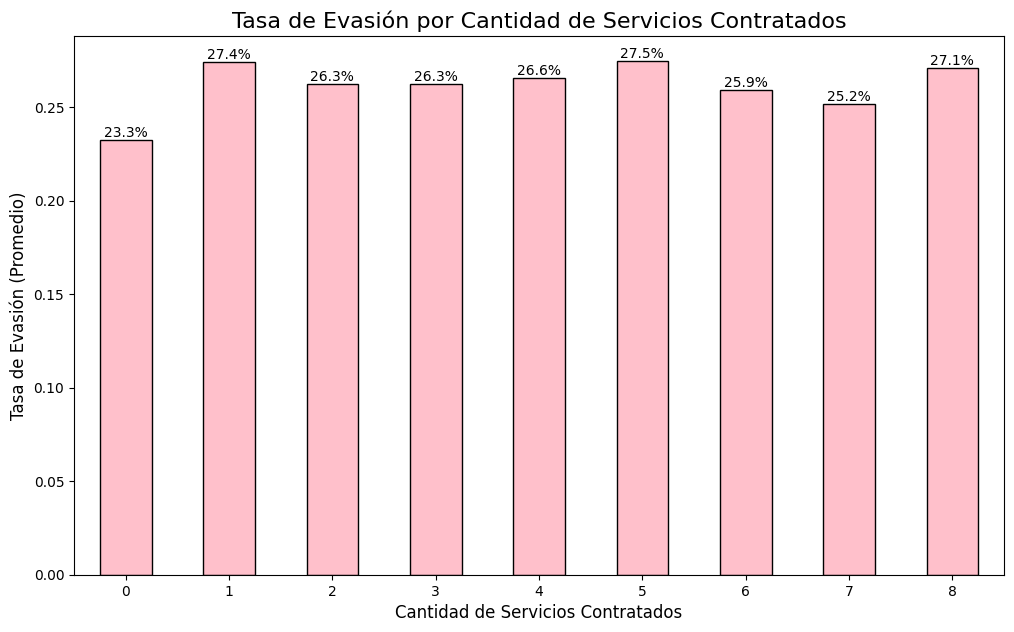

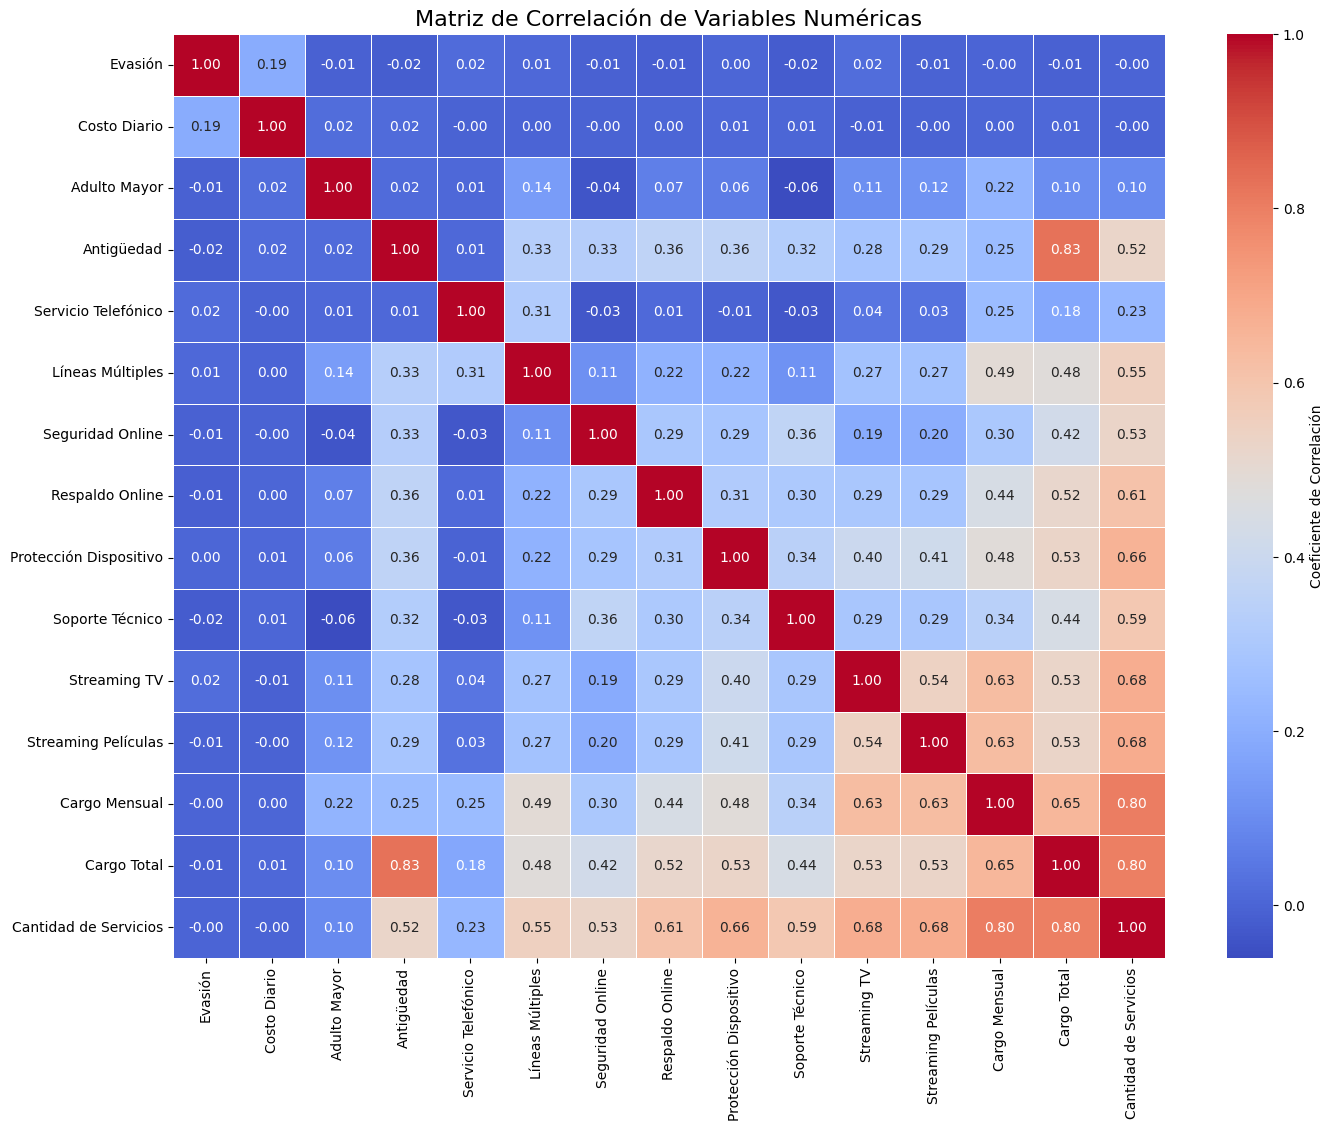

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette(['yellow', 'pink', 'orange', 'blue'])
plt.style.use('seaborn-v0_8-bright')
plt.figure(figsize=(10,6))
#---IX----

# Crear un nuevo DataFrame 'df_limpio'
df_limpio = df[df['Churn'] != ''].copy()
print("Se eliminaron las filas problemáticas.")

# Crear la columna 'Cuentas_Diarias'
df_limpio['Cuentas_Diarias'] = df_limpio['account'].apply(lambda x: x['Charges']['Monthly'] / 30)
print("Se ha creado la columna 'Cuentas_Diarias'.")

# Convertir la columna 'Churn' a formato binario (1 para 'Yes', 0 para 'No')
df_limpio['Churn'] = df_limpio['Churn'].map({'Yes': 1, 'No': 0})
print("Se ha convertido la columna 'Churn' a formato binario.")

# Renombrar las columnas a español para mayor claridad
mapeo_columnas = {
    'customerID': 'ID_Cliente',
    'Churn': 'Evasion',
    'customer': 'Cliente',
    'phone': 'Servicio_Telefonico',
    'internet': 'Servicio_Internet',
    'account': 'Cuenta',
    'Cuentas_Diarias': 'Costo_Diario'
}
df_limpio = df_limpio.rename(columns=mapeo_columnas)
print("Se han renombrado las columnas del DataFrame.")

#---Normalización de Datos Anidados---

# Normalizar las columnas con diccionarios
df_cliente_norm = pd.json_normalize(df_limpio['Cliente'])
df_telefono_norm = pd.json_normalize(df_limpio['Servicio_Telefonico'])
df_internet_norm = pd.json_normalize(df_limpio['Servicio_Internet'])
df_cuenta_norm = pd.json_normalize(df_limpio['Cuenta'])

# Unir todas las partes normalizadas en un solo DataFrame final
df_final = df_limpio[['ID_Cliente', 'Evasion', 'Costo_Diario']].copy()
df_final = pd.concat([df_final, df_cliente_norm, df_telefono_norm, df_internet_norm, df_cuenta_norm], axis=1)

#---Corrección de Tipos de Datos Numéricos---

# La columna 'Charges.Total' puede contener espacios y necesita ser convertida a numérica
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')
df_final['Charges.Total'] = df_final['Charges.Total'].fillna(0)

#---Ingeniería de Características: Conteo de Servicios---

# Lista de columnas que representan un servicio
columnas_servicios = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                      'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Convertir 1 para 'Yes' y cualquier otro valor a 0 para 'No'
for col in columnas_servicios:
    df_final[col] = df_final[col].apply(lambda x: 1 if x == 'Yes' else 0)

# Crear la columna 'Cantidad_Servicios' sumando los servicios
df_final['Cantidad_Servicios'] = df_final[columnas_servicios].sum(axis=1)
print("Se ha creado la columna 'Cantidad_Servicios'.")

#---Análisis de Evasión por Cantidad de Servicios Contratados---

# Calcular la tasa de evasión para cada cantidad de servicios
tasa_evasion_por_servicios = df_final.groupby('Cantidad_Servicios')['Evasion'].mean()

# Desarrollo del gráfico
plt.figure(figsize=(12, 7))
ax = tasa_evasion_por_servicios.plot(kind='bar', color='pink', edgecolor='black')

# Añadir el porcentaje sobre cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1%}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Configurar el gráfico
ax.set_title('Tasa de Evasión por Cantidad de Servicios Contratados', fontsize=16)
ax.set_ylabel('Tasa de Evasión (Promedio)', fontsize=12)
ax.set_xlabel('Cantidad de Servicios Contratados', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Mostrar el gráfico
plt.show()

#---Análisis de Correlación General---

# Seleccionar solo las columnas numéricas para el análisis de correlación
df_numerico = df_final.select_dtypes(include=['number'])

# Calcular la matriz de correlación
matriz_correlacion = df_numerico.corr()

# Desarrollo del gráfico
plt.figure(figsize=(16, 12))

# Crear un diccionario para traducir los nombres de las columnas y filas al español
traduccion_numericos = {
    'Evasion': 'Evasión',
    'Costo_Diario': 'Costo Diario',
    'SeniorCitizen': 'Adulto Mayor',
    'tenure': 'Antigüedad',
    'PhoneService': 'Servicio Telefónico',
    'MultipleLines': 'Líneas Múltiples',
    'OnlineSecurity': 'Seguridad Online',
    'OnlineBackup': 'Respaldo Online',
    'DeviceProtection': 'Protección Dispositivo',
    'TechSupport': 'Soporte Técnico',
    'StreamingTV': 'Streaming TV',
    'StreamingMovies': 'Streaming Películas',
    'Charges.Monthly': 'Cargo Mensual',
    'Charges.Total': 'Cargo Total',
    'Cantidad_Servicios': 'Cantidad de Servicios'
}

# Renombrar las columnas y filas al español de la matriz de correlación
matriz_correlacion_traducida = matriz_correlacion.rename(columns=traduccion_numericos, index=traduccion_numericos)
ax = sns.heatmap(matriz_correlacion_traducida, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5,
                 cbar_kws={'label': 'Coeficiente de Correlación'})

# Configurar el gráfico
plt.title('Matriz de Correlación de Variables Numéricas', fontsize=16)

# Mostrar el gráfico
plt.show()

# Nota: Este código analiza la relación entre la tasa de evasión y cantidad servicios contratados de dos formas.
# Primero, incluyendo un gráfico de barras sobre la tasa de evasión por cantidad de servicios.
# Segundo, una matriz de correlación para visualizar la relación entre todas las variables numéricas los colores indican la fuerza de la relación: rojo para positiva y azul para negativa.

#📄Informe final

Informe final

Descripción

Finaliza el desafío elaborando un informe dentro del mismo notebook que resuma todo el trabajo realizado. El informe debe incluir:

- Introducción: Explica el objetivo del análisis y el problema de evasión de clientes (Churn).

- Limpieza y Tratamiento de Datos: Describe los pasos realizados para importar, limpiar y procesar los datos.

- Análisis Exploratorio de Datos: Presenta los análisis realizados, incluyendo gráficos y visualizaciones para identificar patrones.

- Conclusiones e Insights: Resume los principales hallazgos y cómo estos datos pueden ayudar a reducir la evasión.

- Recomendaciones: Ofrece sugerencias estratégicas basadas en tu análisis.

# 🌟 Análisis de Evasión de Clientes (Churn) – Telecom X LATAM  

## 🔹 Introducción  
Este proyecto analiza los datos de clientes de **Telecom X**, una empresa ficticia de telecomunicaciones en América Latina.  
El objetivo es **entender los factores que explican la evasión de clientes (churn)** y proponer estrategias de retención basadas en datos.  

La evasión es un reto crítico en telecomunicaciones: cada cliente perdido significa **menos ingresos y mayores costos de adquisición**.  

---

## 🔹 Metodología  
1. **Extracción y Limpieza de Datos**  
   - Datos obtenidos desde una API en JSON.  
   - Normalización y limpieza: eliminación de inconsistencias y creación de nuevas variables (`Costo Diario`, `Cantidad de Servicios`).  

2. **Análisis Exploratorio de Datos (EDA)**  
   - Distribución de churn → **26.5% de clientes cancelaron**.  
   - Variables críticas: contrato, antigüedad, cargos mensuales y método de pago.  
   - Visualizaciones en colores llamativos (rosado, menta, naranja, amarillo) para mayor claridad.  

---

## 🔹 Hallazgos Clave  
📌 **Contratos Mes a Mes** → mucho más propensos a cancelar.  
📌 **Clientes nuevos (baja antigüedad)** → representan el grupo de mayor riesgo.  
📌 **Pagos con Cheque Electrónico** → concentran la mayor tasa de churn.  
📌 **Cargos mensuales altos** → aumentan la evasión si el valor percibido no es claro.  
📌 **Cantidad de servicios** → tener muy pocos (1-2) o demasiados (7-8) eleva el riesgo. El “punto dulce” está entre **3 y 6 servicios**.  

---

## 🔹 Recomendaciones Estratégicas  
✅ Incentivar **contratos de 1 o 2 años** con descuentos o beneficios.  
✅ Implementar un **programa de bienvenida** para los primeros 3 meses.  
✅ Motivar el cambio a **métodos de pago automáticos** con beneficios.  
✅ Aplicar **ventas cruzadas inteligentes**, ofreciendo paquetes ajustados al perfil del cliente.  
✅ Crear un **sistema de alertas tempranas** para contactar a clientes de alto riesgo antes de que cancelen.  

---

## 🔹 Conclusión  
El análisis muestra que **el contrato, la antigüedad y el método de pago** son los mayores predictores de evasión.  
Al aplicar estas recomendaciones, Telecom X puede:  
✨ Reducir significativamente el churn.  
✨ Mejorar la satisfacción y lealtad de sus clientes.  
✨ Optimizar la inversión en retención.  

📊 Este proyecto sienta las bases para un futuro modelo de **Machine Learning** que prediga clientes en riesgo y potencie aún más la estrategia de retención.  
